# Determinants of flood in Malaysia (2000 - 2010) #

The goal of this project is to identify factors influencing flood occurrences across states in Malaysia. 
By using Python, I will perform exploratory data analysis (EDA) followed by maching learning model creation to identify factors and provide insights regarding flood occurrences in Malaysia. 

# Setup #

I will be importing relevant modules to perform the required tasks for this project, followed by reading the csv file.

In [3]:
# Import relevant modules

## Operational modules
import numpy as np 
import pandas as pd

## Visualisation module
import matplotlib.pyplot as plt
import seaborn as sns

## Model preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

## Machine learning module
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluation
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, ConfusionMatrixDisplay


In [4]:
# Read the Excel file

data = pd.read_csv(r"C:\Users\user\Downloads\_MalaysiaFloodDataset_MalaysiaFloodDataset.csv") 

# Exploratory data analysis

## 1. Exploration and cleaning
For this part, I will explore the dataset, and perform cleaning if necessary

In [5]:
data.head()
# based on the dataset - the column ['FLOOD'] will be used as outcome variable, while the other columns serve as predictor variables

,STATE,DISTRICT,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,0V,DEC,ANNUAL RAINFALL,FLOOD
0,108,108001,2000,158.83,162.37,210.68,192.51,214.73,157.55,98.80,165.63,289.14,388.77,313.59,213.60,2566.19,0
1,108,108001,2001,159.10,41.71,174.50,220.56,177.65,105.61,166.59,193.88,206.40,298.14,232.54,150.82,2127.50,1
2,108,108001,2002,61.25,50.34,88.15,207.13,115.01,96.08,115.78,111.12,285.96,206.94,261.33,264.61,1863.70,1
3,108,108001,2003,82.88,118.04,193.40,100.36,101.07,166.81,167.61,270.87,238.84,682.07,251.46,182.35,2555.77,1
4,108,108001,2004,119.30,71.16,120.80,138.74,120.27,146.03,145.35,172.92,222.61,360.21,187.22,168.79,1973.39,1


In [6]:
data.columns

Index(['STATE', 'DISTRICT', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
       'JUL', 'AUG', 'SEP', 'OCT', '0V', 'DEC', 'ANNUAL RAINFALL', 'FLOOD '],
      dtype='object')

In [7]:
# column name '0V' corrected to 'NOV', and 'FLOOD ' to 'FLOOD' 
data = data.rename(columns={'0V':'NOV', 'FLOOD ': 'FLOOD'})
data.head()

,STATE,DISTRICT,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOOD
0,108,108001,2000,158.83,162.37,210.68,192.51,214.73,157.55,98.80,165.63,289.14,388.77,313.59,213.60,2566.19,0
1,108,108001,2001,159.10,41.71,174.50,220.56,177.65,105.61,166.59,193.88,206.40,298.14,232.54,150.82,2127.50,1
2,108,108001,2002,61.25,50.34,88.15,207.13,115.01,96.08,115.78,111.12,285.96,206.94,261.33,264.61,1863.70,1
3,108,108001,2003,82.88,118.04,193.40,100.36,101.07,166.81,167.61,270.87,238.84,682.07,251.46,182.35,2555.77,1
4,108,108001,2004,119.30,71.16,120.80,138.74,120.27,146.03,145.35,172.92,222.61,360.21,187.22,168.79,1973.39,1


In [8]:
# exploring the statistical measures of the variables 

data.describe()

,STATE,DISTRICT,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOOD
count,825.000000,825.00000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,108.493333,108537.84000,2005.000000,234.117527,146.523309,190.234715,195.297673,185.783952,184.996194,198.949261,203.721261,228.316667,301.028303,319.190570,318.813867,2706.973358,0.420606
std,4.189419,4171.67445,3.164196,174.996518,120.125859,84.469198,82.442372,73.098666,82.356570,73.642059,64.378187,77.334859,107.027786,130.187797,150.610271,558.700699,0.493956
min,101.000000,101001.00000,2000.000000,3.650000,3.010000,22.580000,29.540000,67.610000,54.510000,73.030000,83.250000,81.350000,48.700000,92.450000,54.120000,1686.500000,0.000000
25%,105.000000,105001.00000,2002.000000,99.010000,51.540000,125.690000,133.220000,128.780000,121.830000,153.200000,158.910000,174.520000,230.710000,227.720000,207.800000,2308.590000,0.000000
50%,109.000000,109005.00000,2005.000000,193.950000,121.380000,185.450000,193.010000,171.510000,171.980000,183.740000,195.780000,211.870000,285.760000,299.790000,276.930000,2580.060000,0.000000
75%,112.000000,112011.00000,2008.000000,308.690000,205.300000,239.090000,246.010000,231.200000,223.890000,228.080000,234.800000,265.890000,351.920000,370.360000,412.450000,3022.760000,1.000000
max,113.000000,113013.00000,2010.000000,1103.880000,614.670000,476.170000,431.920000,411.290000,460.610000,576.850000,475.360000,746.540000,682.070000,1006.350000,789.410000,4900.470000,1.000000


In [9]:
# evaluating the variables datatypes and checking for any null rows
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATE            825 non-null    int64  
 1   DISTRICT         825 non-null    int64  
 2   YEAR             825 non-null    int64  
 3   JAN              825 non-null    float64
 4   FEB              825 non-null    float64
 5   MAR              825 non-null    float64
 6   APR              825 non-null    float64
 7   MAY              825 non-null    float64
 8   JUN              825 non-null    float64
 9   JUL              825 non-null    float64
 10  AUG              825 non-null    float64
 11  SEP              825 non-null    float64
 12  OCT              825 non-null    float64
 13  NOV              825 non-null    float64
 14  DEC              825 non-null    float64
 15  ANNUAL RAINFALL  825 non-null    float64
 16  FLOOD            825 non-null    int64  
dtypes: float64(13), 

In [10]:
# check for any duplicates rows 
data.duplicated().sum()



np.int64(11)

## 2) Data visualisation 

In this part, I will use visualisation to explore the variables and their relationships, and perform further cleaning if required 

Text(0.5, 1.0, 'Flood occurrences in Malaysia')

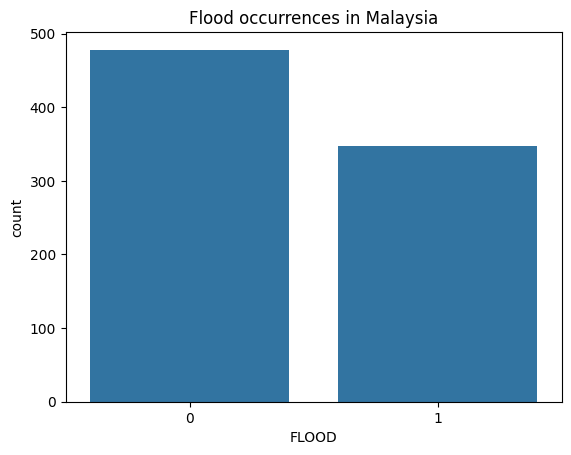

In [11]:

sns.countplot(data=data, x='FLOOD')
plt.title('Flood occurrences in Malaysia')

# in following visual - there are proportionately less flood compared flood occurrences

Text(0.5, 1.0, 'Flood occurrences across 2000-2010')

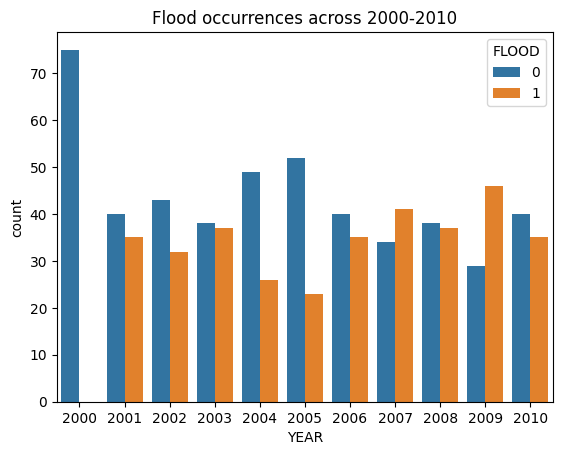

In [12]:
sns.countplot(data=data, x='YEAR', hue='FLOOD')
plt.title('Flood occurrences across 2000-2010')

# in following visual - there was more years without flood, for exception of 2007 and 2009
# however for year 2000 - there was no flood recorded, despite reports of flood in the year 
# ideally - the data should be clarified with dataset owner
# for the project purpose - year 2000 will be excluded from the analysis

In [13]:
data = data[data['YEAR'] != 2000]
data['YEAR'].unique()

# removed rows with year 2000 as the year had no information of flood occurrences based on analysis in Power BI (when there was reports of flood in the year)

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010])

FLOOD
0    0.537333
1    0.462667
Name: proportion, dtype: float64

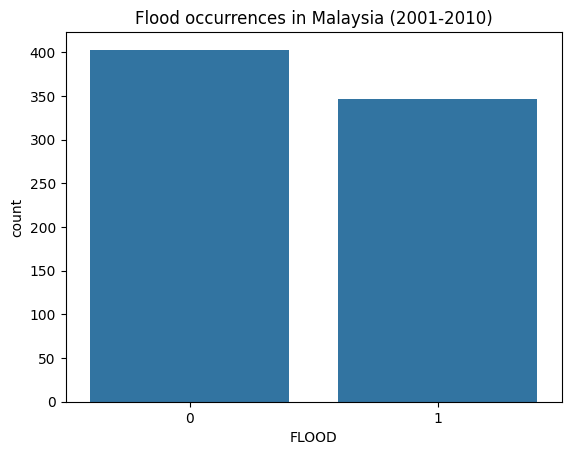

In [14]:
# flood occurrences proprotion reevaluated with removal of data from year 2000
sns.countplot(data=data, x='FLOOD')
plt.title('Flood occurrences in Malaysia (2001-2010)')

# in following visual - there are still proportionately less flood compared flood occurrences
data['FLOOD'].value_counts(normalize=True)

Text(0.5, 1.0, 'Flood occurrences across 13 states ')

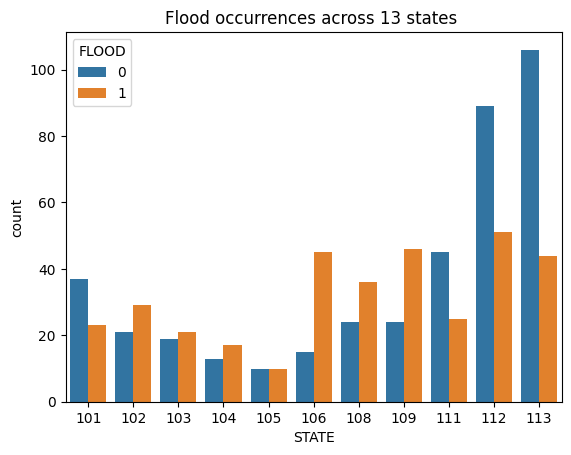

In [15]:
sns.countplot(data=data, x='STATE', hue='FLOOD')
plt.title('Flood occurrences across 13 states ')

# in following visual, half of the states has more flood occurrences than no flood each year, in particular state 106, 108, 109 
# state 112 and 113 also has proportionately more years without flood than years with flood

In [16]:
data['STATE'].sort_values().unique()




array([101, 102, 103, 104, 105, 106, 108, 109, 111, 112, 113])

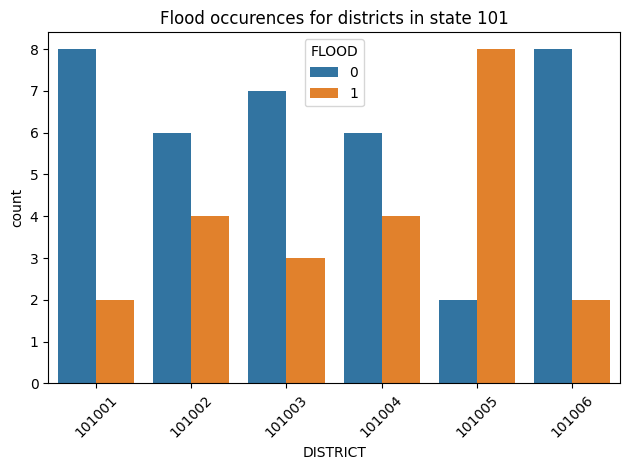

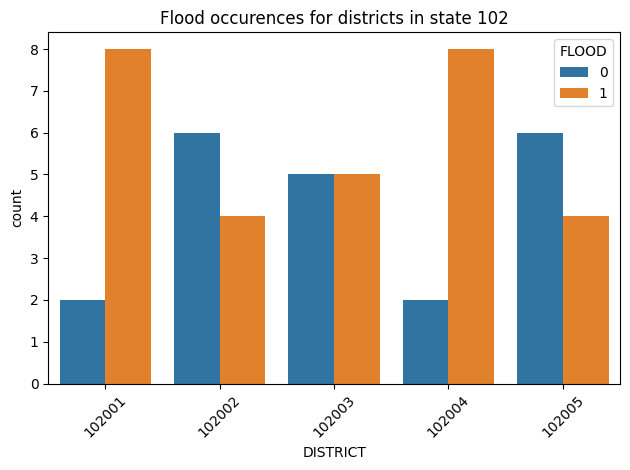

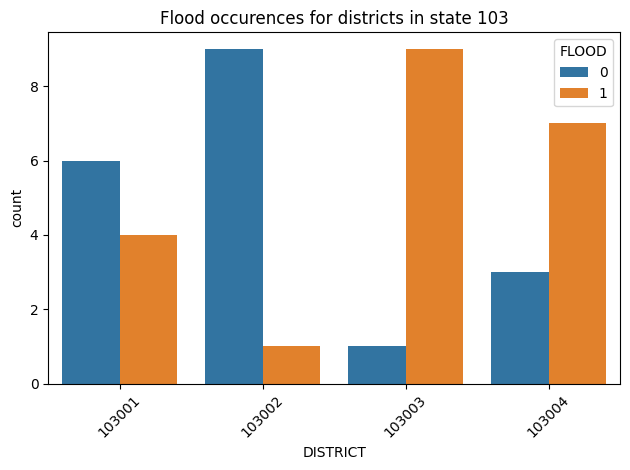

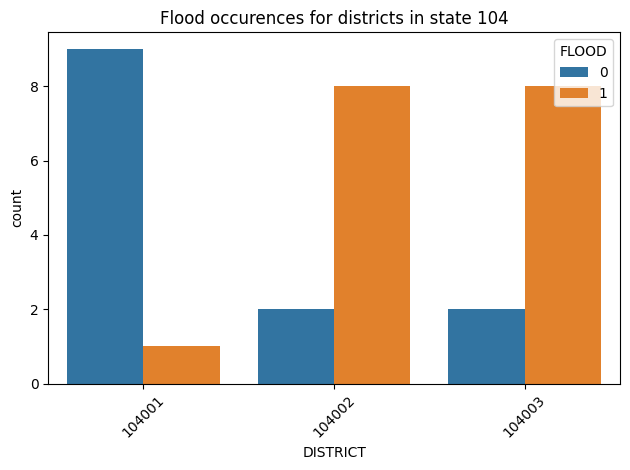

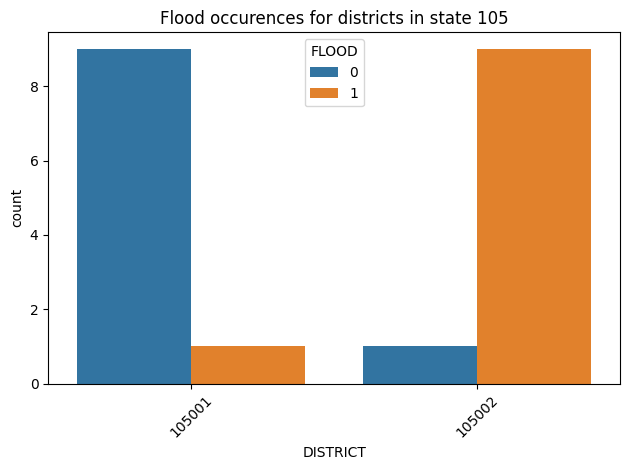

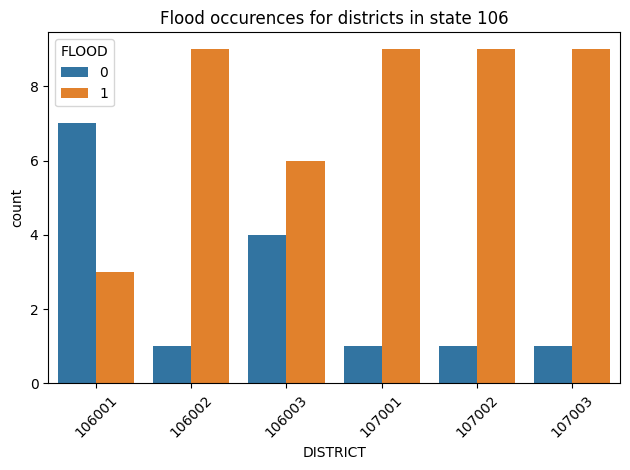

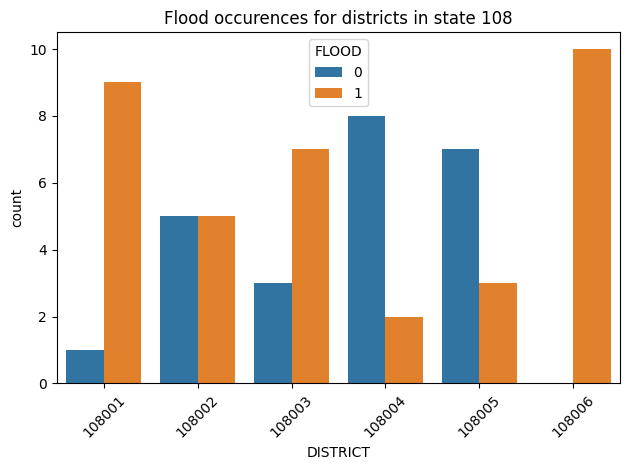

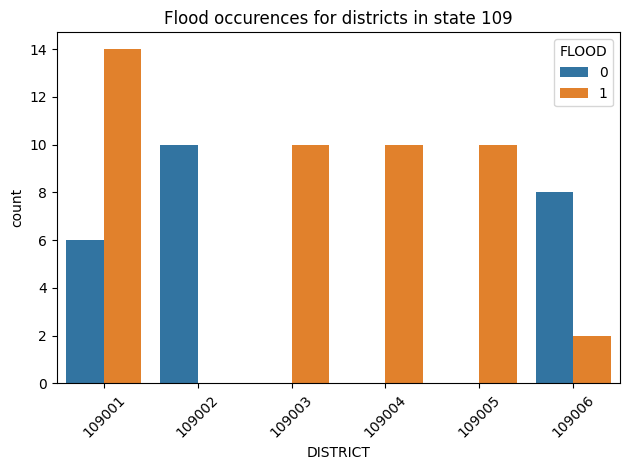

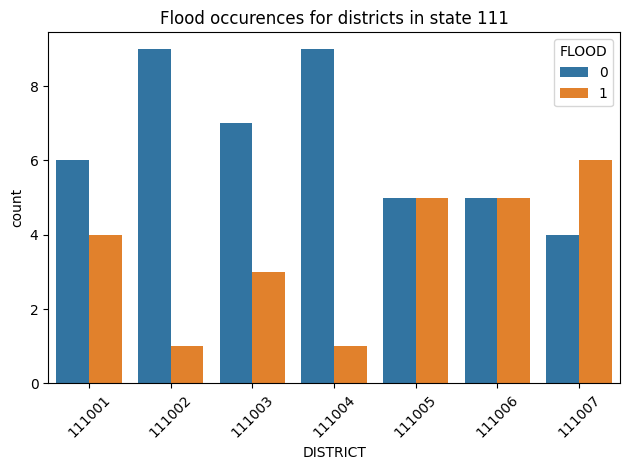

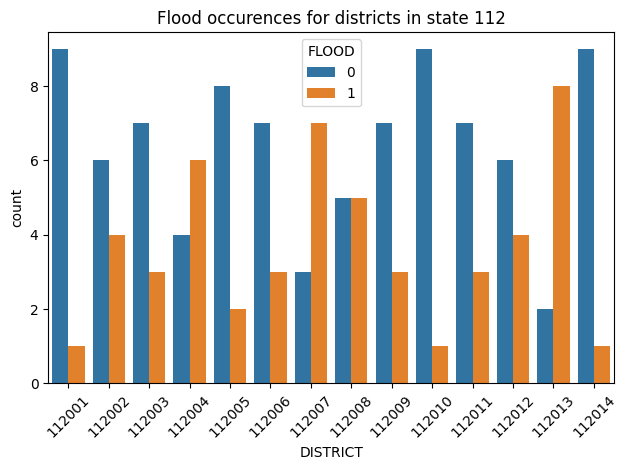

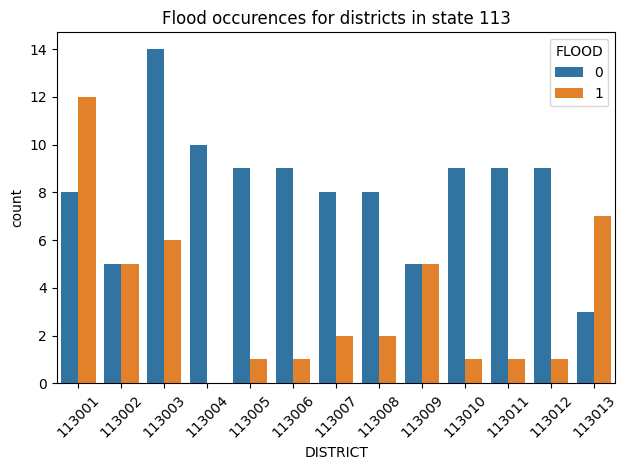

In [17]:
state_to_plot = [101, 102, 103, 104, 105, 106, 108, 109, 111, 112, 113]

for state in state_to_plot:
    state_data = data[data['STATE'] == state]
    sns.countplot(data=state_data, x='DISTRICT', hue='FLOOD')
    plt.title(f'Flood occurences for districts in state {state}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In the above visual - it was identified that some districts under 106 included districts that started with 107
Given the district labels started with 3-digit for state followed by 3-digit for the 
Ideally - the data should be clarified with the dataset owner
For the project purpose - the district that labelled with first 3-digit of 107 will be has their states relabelled to 107

In [18]:
data['DISTRICT'] = data['DISTRICT'].astype(str)
districts_to_relabel = ['107001', '107002', '107003']
data.loc[data['DISTRICT'].isin(districts_to_relabel), 'STATE'] = 107
data['STATE'].sort_values().unique()

array([101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113])

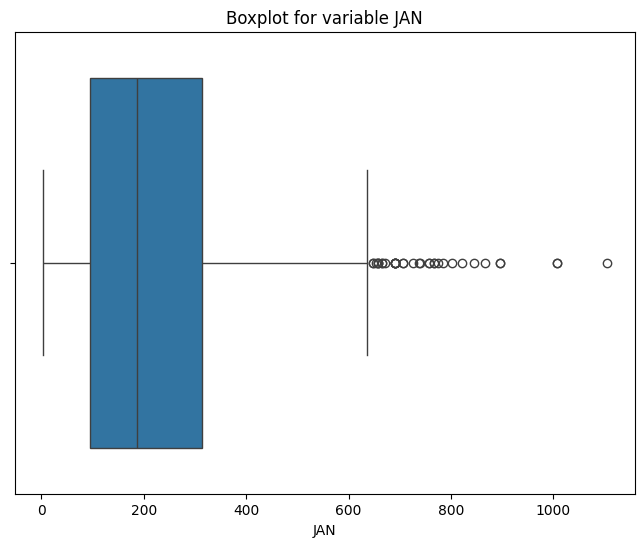

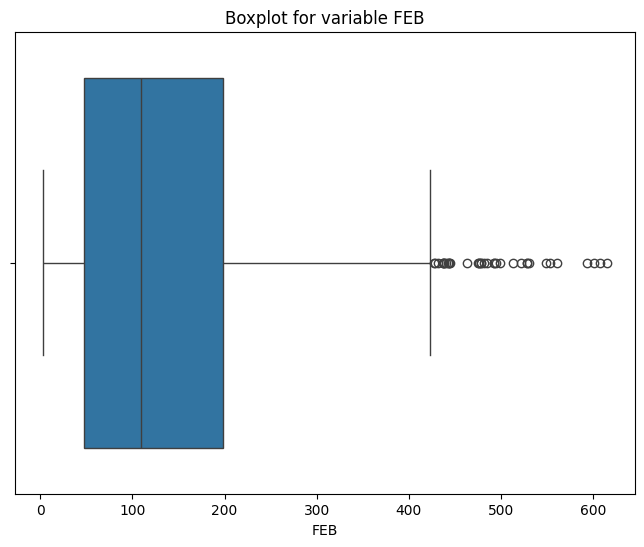

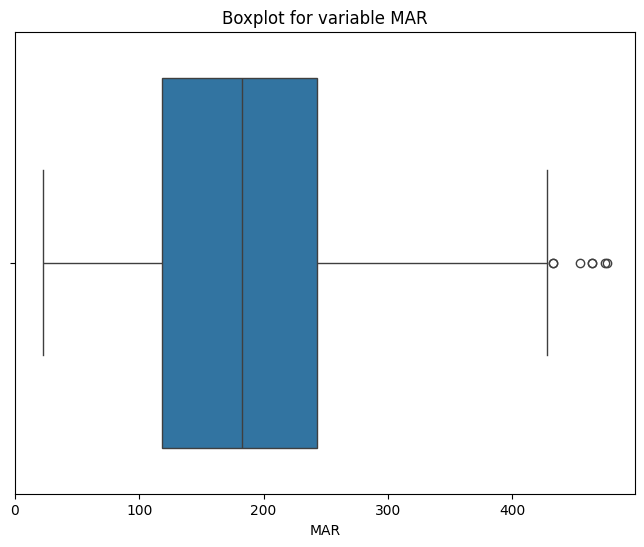

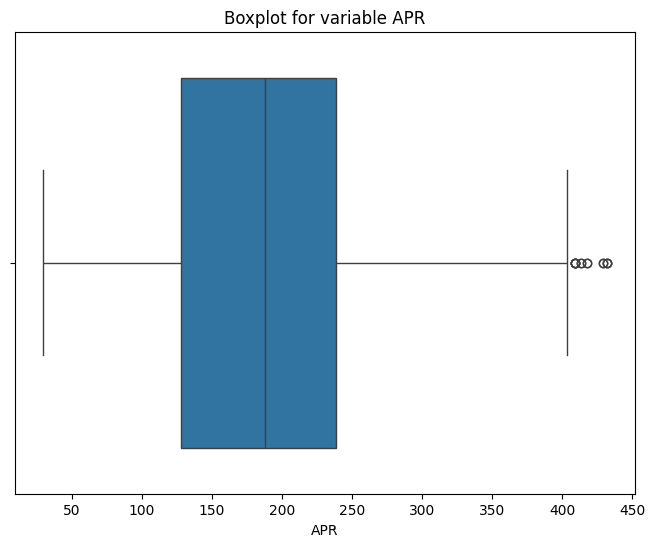

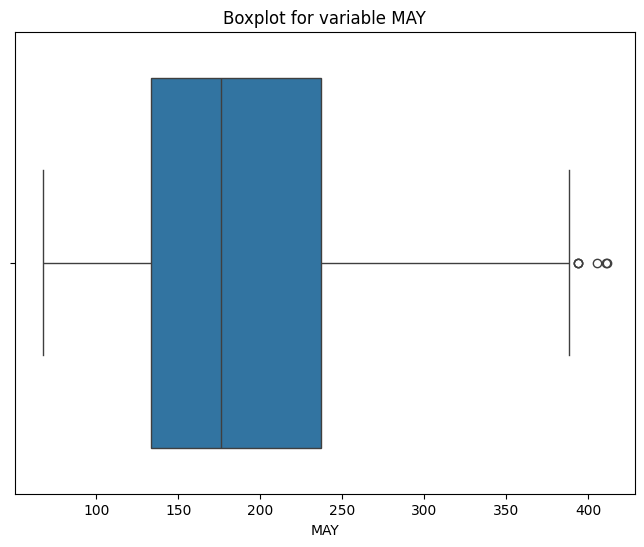

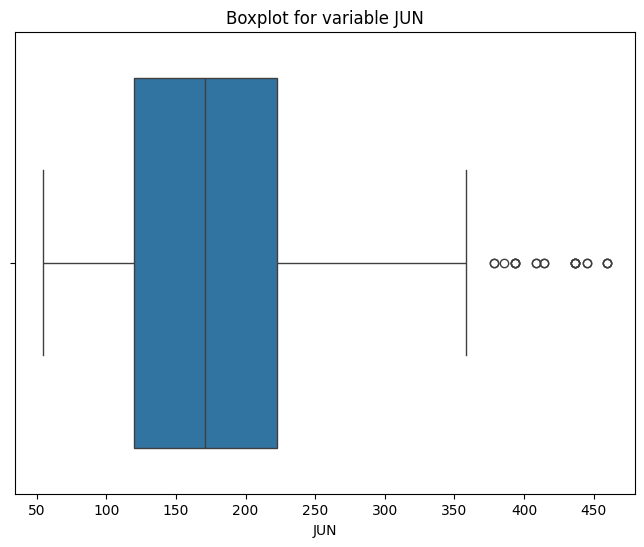

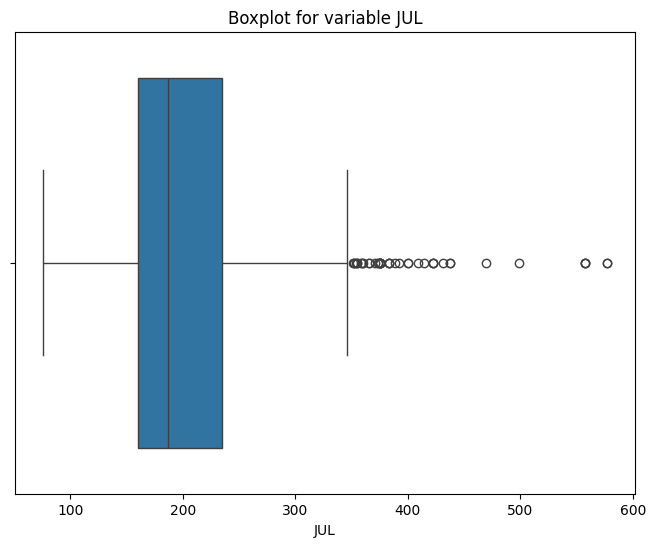

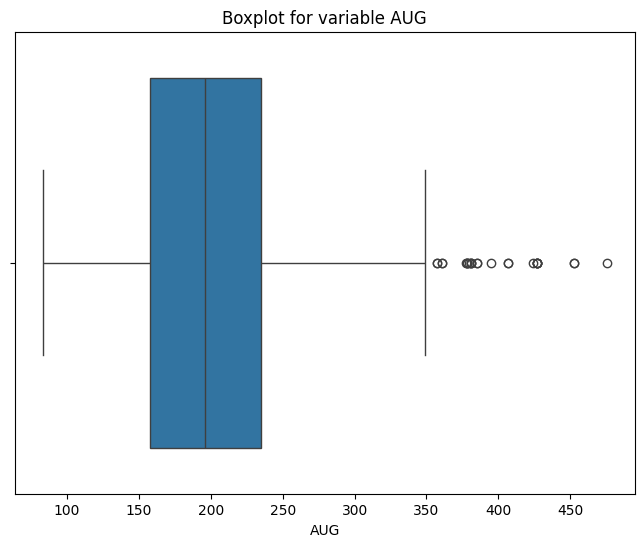

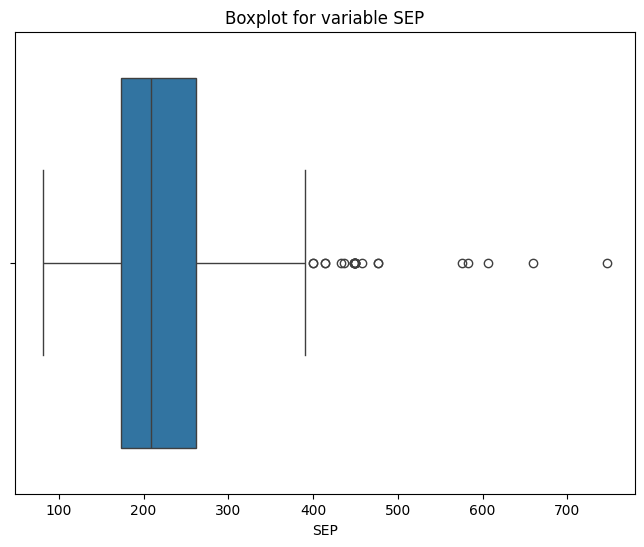

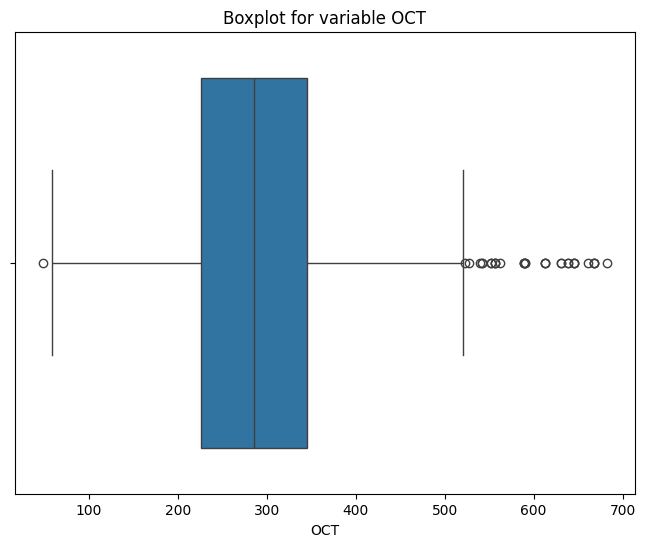

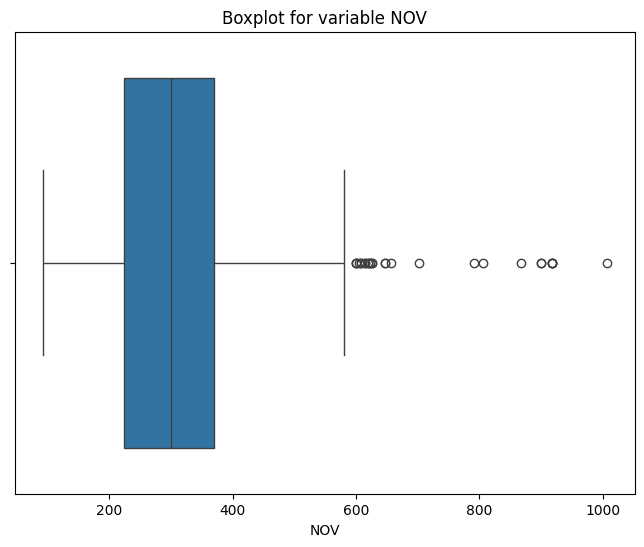

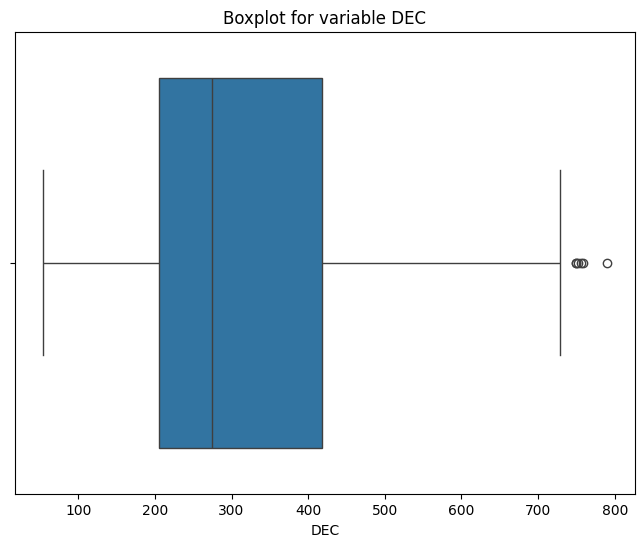

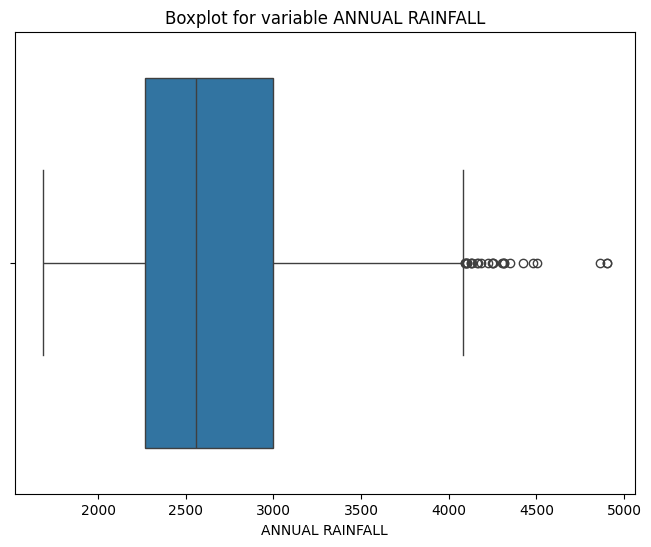

In [19]:
# boxplot to identify presence of outliers in the data
column_to_plot = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
       'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL RAINFALL']

for column in column_to_plot:
    plt.figure(figsize=(8,6))
    sns.boxplot(data=data, x=column)
    plt.title(f'Boxplot for variable {column}')
   
    plt.show

In the above visuals - there are outliers for each variables for the monthly and annual rainfall 
For the project - the variables will be scaled for relevant machine learning models

[2001 2002 2003 2004 2005 2006 2007 2008 2009 2010]


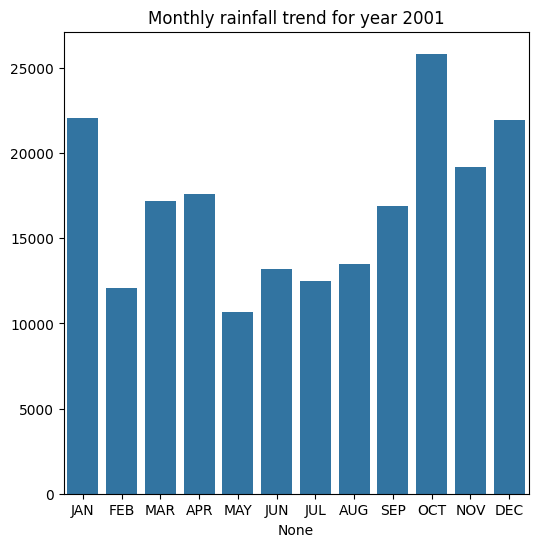

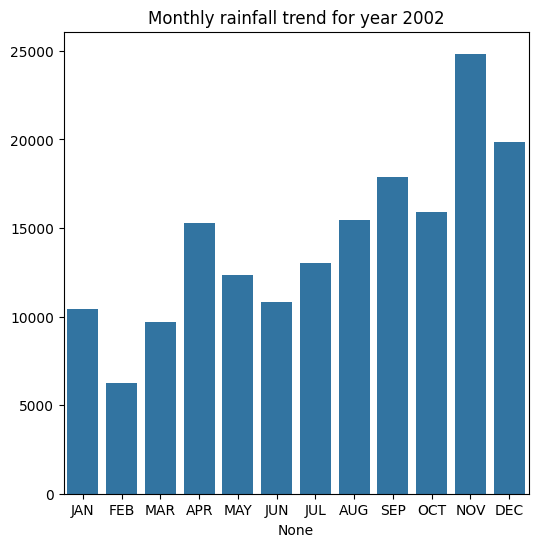

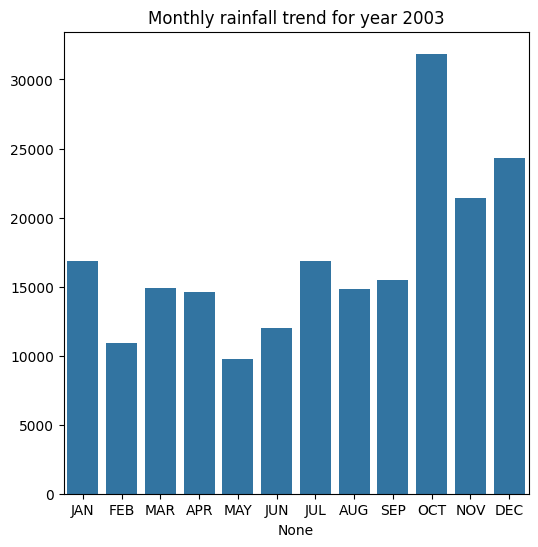

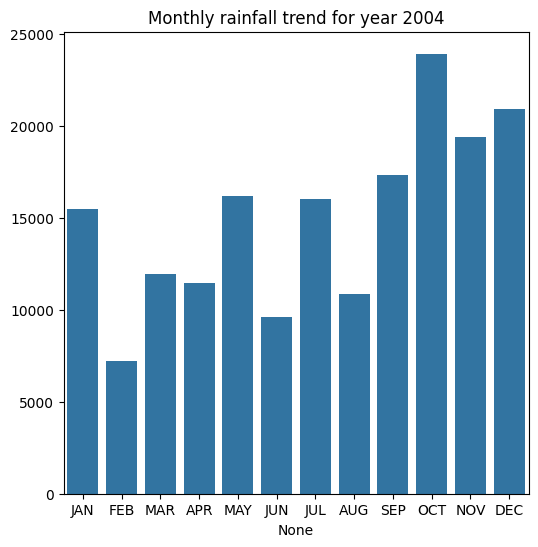

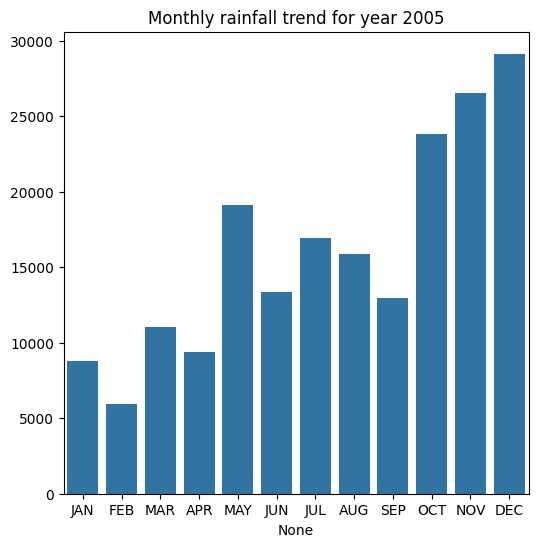

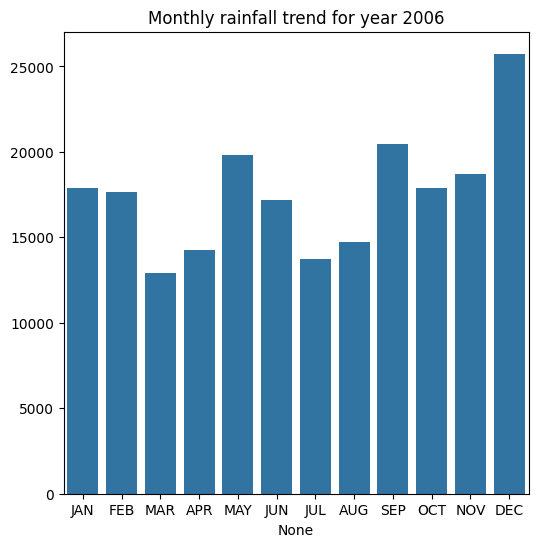

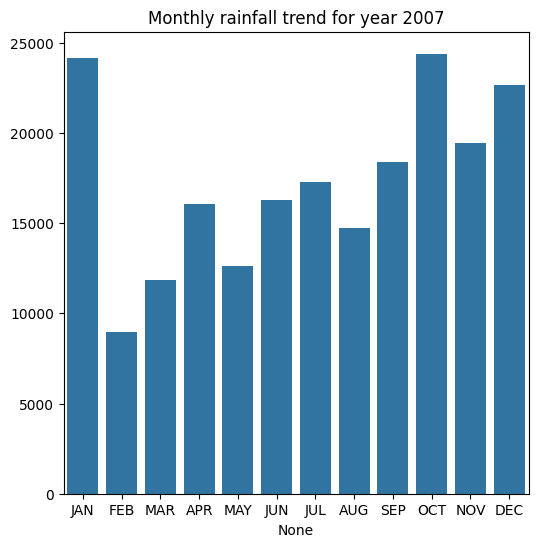

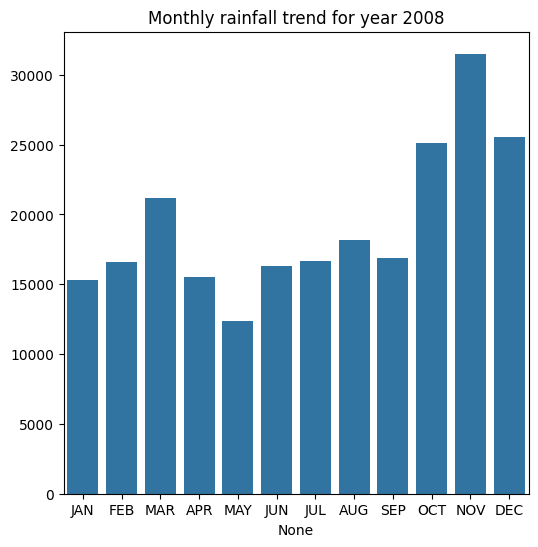

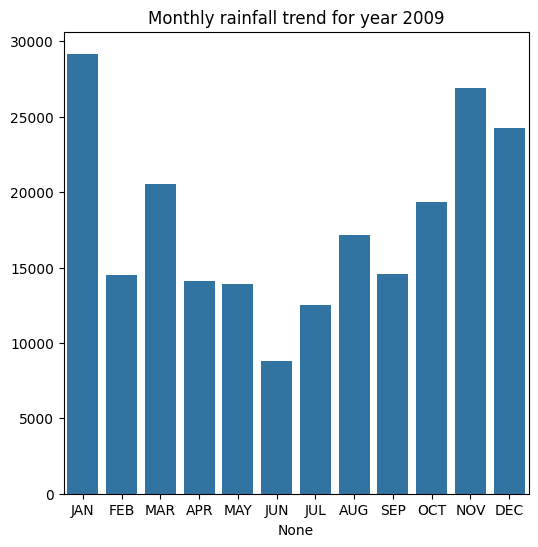

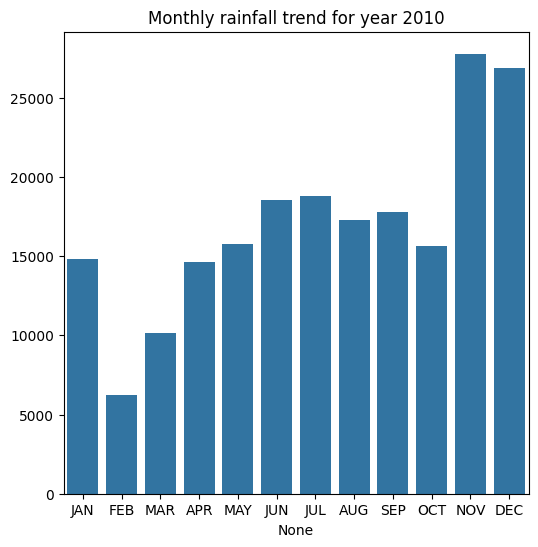

In [20]:
# plotting average of monthly rainfall trend for each year
print(data['YEAR'].sort_values().unique())
year_unique = [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010]
month_columns = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
       'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

monthly_rainfall_sum = data[month_columns].sum()
monthly_rainfall_sum

for i in year_unique:
    monthly_rainfall_sum = data[data['YEAR']==i][month_columns].sum()
    plt.figure(figsize=(6,6))
    sns.barplot(x=monthly_rainfall_sum.index, y=monthly_rainfall_sum.values)
    plt.title(f'Monthly rainfall trend for year {i}')
    plt.show()


In the above visuals, the monthly rainfall trend across the years showed consistent trend of high rainfall amount in the last quarter of the year (Oct - Dec) until January. 
It was also noted the monthly rainfall in January for 2007 and 2009 (which is the year with higher proportion of flood than no flood) is higher than other years. 

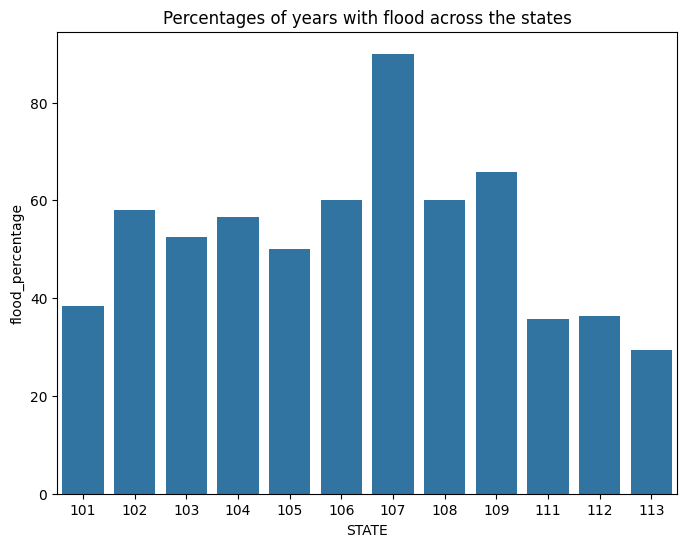

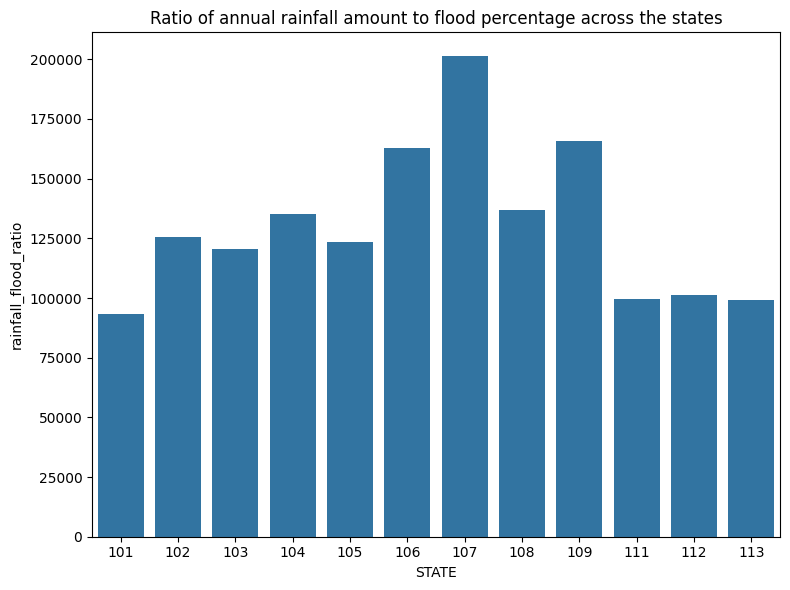

In [21]:
# annual rainfall for the states across 2001 - 2010
# rainfall_flood_ratio was created to normalise the annual rainfall amount, given each states has different proportion in flood occurrences and rainfall amount
state = [101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 113]
annual_rainfall = data[['STATE', 'ANNUAL RAINFALL', 'FLOOD']]
annual_rainfall = annual_rainfall.groupby('STATE', as_index=False).agg(
    avg_annual_rainfall = ('ANNUAL RAINFALL', 'mean'),
    flood_percentage = ('FLOOD', lambda x: (x == 1).sum()/len(x)*100))
annual_rainfall['rainfall_flood_ratio'] = annual_rainfall['avg_annual_rainfall'] * annual_rainfall['flood_percentage']

fig,ax1 = plt.subplots(figsize=(8,6))
sns.barplot(data=annual_rainfall, x='STATE', y='flood_percentage', ax=ax1)
ax1.set_title('Percentages of years with flood across the states')
fig, ax2 = plt.subplots(figsize=(8,6))
sns.barplot(data=annual_rainfall, x='STATE', y='rainfall_flood_ratio', ax=ax2)
ax2.set_title('Ratio of annual rainfall amount to flood percentage across the states')
plt.tight_layout()
plt.show()

# based on the visuals below - the states with higher flood percentages (in particular state 106, 109), also has higher annual rainfall amount when normalised to the flood percentages 


In [22]:
# evaluating proportion/percentage of flood for each states
data.groupby('STATE', as_index=False)['FLOOD'].value_counts(normalize=True).sort_values(['STATE', 'FLOOD'], ascending=True)

,STATE,FLOOD,proportion
0,101,0,0.616667
1,101,1,0.383333
3,102,0,0.420000
2,102,1,0.580000
5,103,0,0.475000
4,103,1,0.525000
7,104,0,0.433333
6,104,1,0.566667
8,105,0,0.500000
9,105,1,0.500000


# Insights from data visualisations #

The notable information from the data visualisations: 
- there are slightly more years without flood compared to years with flood (53%, 47% respectively)
- certain states has higher annual flood percentages compared to others, notably state 107 (90%) and 109 (66%)
- it is also found that states with higher annual flood percentages also has proportionately higher rainfall amount (when normalised to the flood percentages) compared to other states 

# Machine learning model 
For following part, the dataset will undergo feature engineering, followed by model training and selection based on evaluation metrics.
As the outcome variable of interest is 'FLOOD', a binary variable - following model for categorical variable will be used: logistic regression, decision tree classifier, random forest classifier



## Part 1: Feature engineering

In [23]:
# given that the states are not numerically related to each other, the 'STATE' variable had been changed to string

data['STATE'] = data['STATE'].astype(str)
data.dtypes


STATE               object
DISTRICT            object
YEAR                 int64
JAN                float64
FEB                float64
MAR                float64
APR                float64
MAY                float64
JUN                float64
JUL                float64
AUG                float64
SEP                float64
OCT                float64
NOV                float64
DEC                float64
ANNUAL RAINFALL    float64
FLOOD                int64
dtype: object

In [24]:
# feature selection
## given that the outcome variables only for annual record of flood - monthly rainfall will be excluded 
## 'DISTRICT' will be excluded as well to reduce complexity of categorical variable in the model 

data2 = data[['STATE', 'YEAR', 'ANNUAL RAINFALL', 'FLOOD']]
data2.head()

,STATE,YEAR,ANNUAL RAINFALL,FLOOD
1,108,2001,2127.50,1
2,108,2002,1863.70,1
3,108,2003,2555.77,1
4,108,2004,1973.39,1
5,108,2005,2190.35,1


In [25]:
# encode ['STATE'] variable using pd.getdummies()

data2 = pd.get_dummies(data=data2)
data2.dtypes


YEAR                 int64
ANNUAL RAINFALL    float64
FLOOD                int64
STATE_101             bool
STATE_102             bool
STATE_103             bool
STATE_104             bool
STATE_105             bool
STATE_106             bool
STATE_107             bool
STATE_108             bool
STATE_109             bool
STATE_111             bool
STATE_112             bool
STATE_113             bool
dtype: object

In [26]:
# split samples into x and y 

x = data2.drop(['FLOOD'], axis = 1)

y = data2['FLOOD']


In [27]:
# splitting samples 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=0, stratify=y)


In [28]:
x_tr, x_valid, y_tr, y_valid = train_test_split(x_train, y_train, test_size = 0.25, random_state=0, stratify=y_train)

In [29]:
# normalise sample for Logistic Regression model

scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)
x_valid_scaled = scaler.fit_transform(x_valid)

In [30]:
# Model 1 - Logistic Regression, model fitting

logreg = LogisticRegression()

logreg.fit(x_train_scaled, y_train)

LogisticRegression()

In [31]:
# Model 2 - Decision Tree Classifier, hyperparameter tuning 

clf = DecisionTreeClassifier(random_state=0)

param_grid = {'max_depth': [3,5,10, None],
              'min_samples_split': [2,5,10],
              'min_samples_leaf': [1,2,4]}

clf_gs = GridSearchCV(clf, param_grid, cv=5)
clf_gs.fit(x_train, y_train)
clf_gs.best_params_, clf_gs.best_estimator_

({'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2},
 DecisionTreeClassifier(max_depth=10, random_state=0))

In [32]:
# Model 3 - Random Forest Classifier, hyperparameter tuning

rf = RandomForestClassifier(random_state=0)

param_grid = {'n_estimators': [50, 150, 300],
              'max_depth': [5,15,25, 50],
              'min_samples_split': [2,5,10],
              'min_samples_leaf': [1,2,5],
              'max_features': ['auto', 'sqrt', None]
              }

rf_gs = GridSearchCV(rf, param_grid, cv=5)
rf_gs.fit(x_train, y_train)

rf_gs.best_estimator_, rf_gs.best_params_

c:\Users\user\notebook_env\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\user\notebook_env\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\user\notebook_env\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\user\notebook_env\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\user\notebook_env\Lib\

(RandomForestClassifier(max_depth=25, min_samples_split=5, n_estimators=50,
                        random_state=0),
 {'max_depth': 25,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 5,
  'n_estimators': 50})

In [33]:
# Evaluating model performance 

model_list = [logreg, clf_gs.best_estimator_, rf_gs.best_estimator_]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']

for i, model in enumerate(model_list):
    print(f'Metrics for {model_names[i]}:')
    if model == logreg:
        y_pred = model.predict(x_valid_scaled)
    else: 
        y_pred = model.predict(x_valid)
    print(f'Accuracy score:', accuracy_score(y_valid, y_pred)*100)
    print(f'Precision score:', precision_score(y_valid, y_pred)*100)
    print(f'Recall score:', recall_score(y_valid, y_pred)*100)
    print(f'F1 score:', f1_score(y_valid, y_pred)*100)
    print("-" * 50)

Metrics for Logistic Regression:
Accuracy score: 65.24822695035462
Precision score: 64.28571428571429
Recall score: 55.38461538461539
F1 score: 59.50413223140496
--------------------------------------------------
Metrics for Decision Tree:
Accuracy score: 81.56028368794325
Precision score: 78.26086956521739
Recall score: 83.07692307692308
F1 score: 80.59701492537313
--------------------------------------------------
Metrics for Random Forest:
Accuracy score: 87.2340425531915
Precision score: 83.09859154929578
Recall score: 90.76923076923077
F1 score: 86.76470588235294
--------------------------------------------------


Based on metrics - random forest classifier has best performance across all metrics 

Confusion matrix for: {'Logistic Regression'}
--------------------------------------------------
Confusion matrix for: {'Decision Tree'}
--------------------------------------------------
Confusion matrix for: {'Random Forest'}
--------------------------------------------------


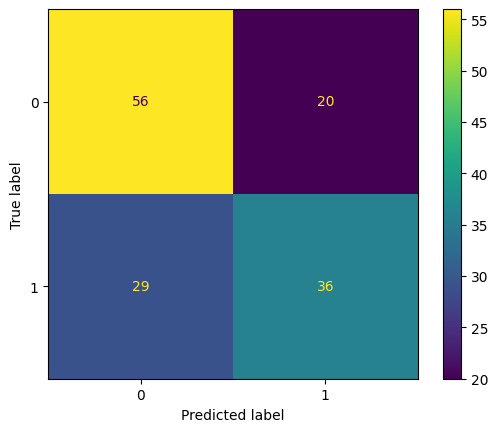

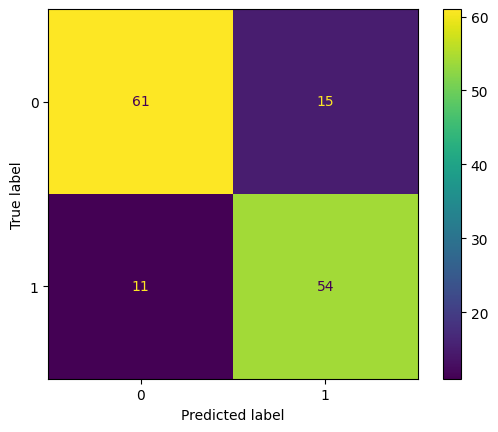

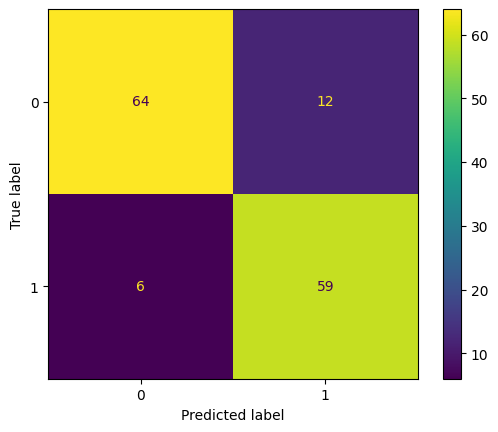

In [34]:
models = [logreg, clf_gs.best_estimator_, rf_gs.best_estimator_]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest']

for i, model in enumerate(models):
    if model == logreg:
        y_pred = model.predict(x_valid_scaled)
    else:
        y_pred = model.predict(x_valid)
    cm = confusion_matrix(y_valid, y_pred, labels = model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    
    print('Confusion matrix for:',{model_names[i]})
    print("-"*50)

Based on the confusion matrix, random forest classifier also shown the best performance, corresponding to its metrics score

Metrics for random forest using test sample
Accuracy score: 67.02127659574468
Precision score: 63.73626373626373
Recall score: 66.66666666666666
F1 score: 65.1685393258427


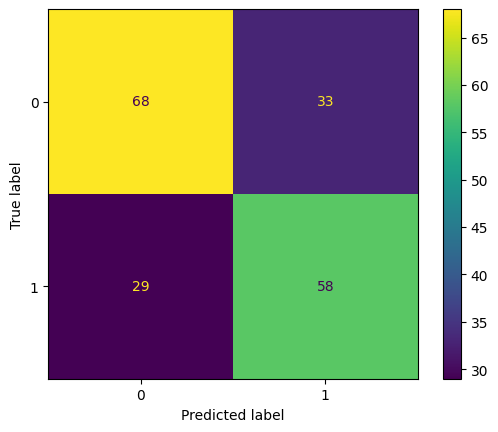

In [35]:
# Random Forest classifier hsa been chosen as champion based on the metrics evaluation 
# the model now tested with the unseen sample in x_test

y_pred_rf2 = rf_gs.best_estimator_.predict(x_test)
print(f'Metrics for random forest using test sample')
print(f'Accuracy score:', accuracy_score(y_test, y_pred_rf2)*100)
print(f'Precision score:', precision_score(y_test, y_pred_rf2)*100)
print(f'Recall score:', recall_score(y_test, y_pred_rf2)*100)
print(f'F1 score:', f1_score(y_test, y_pred_rf2)*100)

cm = confusion_matrix(y_test, y_pred_rf2, labels=rf_gs.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_gs.classes_)
disp.plot()

## the random forest model shown acceptable performance against the test set 


<BarContainer object of 10 artists>

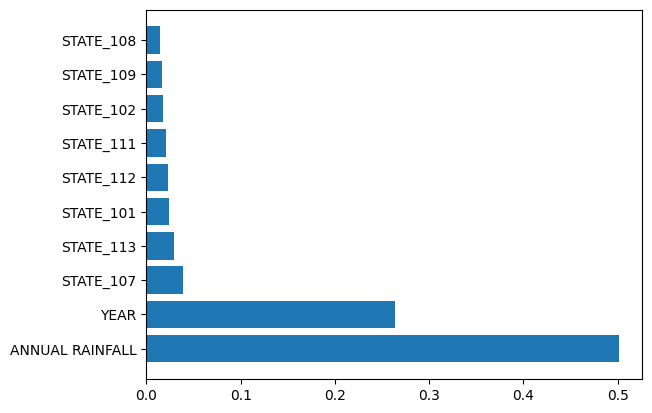

In [36]:
importances = rf_gs.best_estimator_.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
top_10_feature = feature_importance_df.head(10)
plt.barh(top_10_feature['Feature'], top_10_feature['Importance'])

## based on the model, the important determinant factors were notably the annual rainfall amount, followed by year

# Conclusion from the machine learning model:

The random forest was chosen as the champion model as it obtained the best metrics evaluation score 
It performs reasonably well against the test set with f1 score of 65%

The important features for the flood occurrences based on the model was annual rainfall and year 

# Insight from the project 

Further attention is into states that has higher flood occurrences and higher rainfall amount is reasonable for preparation on future flood events.
The year with higher flood occurrences (eg 2007 and 2009) can be looked into to identify factors surrounding flood events in the year 

The model could be improved with further information on the variables, such as:
- the location of the state/districts/latitudes and longitudes, thus providing geographic information which can provide further insight based on its location
- the month when the flood occurred - thus further analysis into flood and monthly rainfall can be done 
- the infrastructure status of the state/district, for further analysis of relationship between flood events and urbanisation of state/district (e.g. state with better drainage system will have lesser flood event)